This notebook is aimed at modelling the non-linear water flow and sand formations on a beach.

Features:
  * water component with density and momentum (Water is incompressible, so it's a cell-wise momentum
  * Incoming wave from sea
  * Sand drag

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib widget
# %matplotlib notebook
import matplotlib as mpl

import scipy.signal as signal
import scipy.ndimage as ndimage
import numba
from numba import jit, njit

import copy
from importlib import reload
import matplotlib.animation as animation
from IPython.display import HTML

import skimage.transform as sktransform 
from skimage import color, morphology

plt.rcParams["animation.html"] = "jshtml"

import pickle


import popdyn.flow as flow

# Create Shore box

In [48]:
np.random.seed(10)
xsize = 200
ysize = 200

scatter = 0.01

slope = 0.05

In [49]:
land = np.zeros((xsize, ysize))
land += np.random.random(size=xsize*ysize).reshape(land.shape) * scatter

xarr = np.linspace(0, 2, xsize)
yarr = np.linspace(0, 2, ysize)
xx, yy = np.meshgrid(xarr, yarr)

hh = yy * slope
land += hh



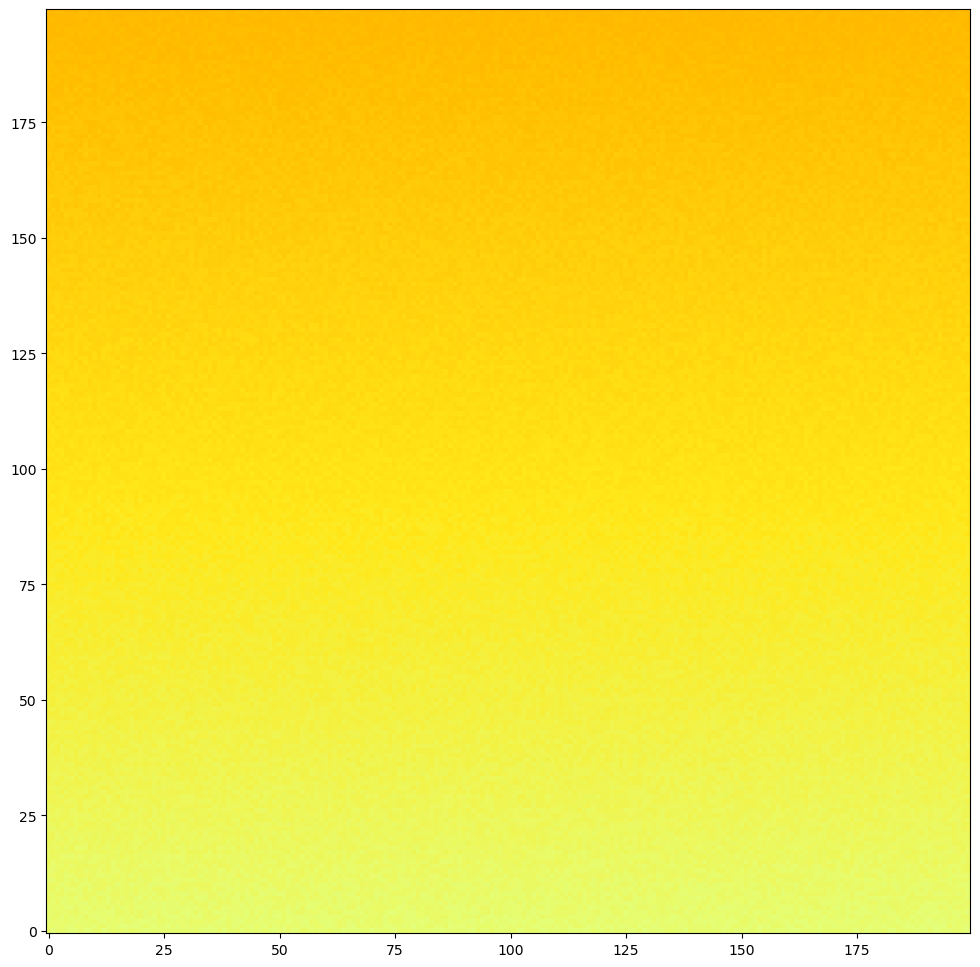

In [50]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
plt.imshow(land, cmap=plt.cm.Wistia, vmin=0, vmax=0.2, origin="lower")

In [16]:
land

array([[0.70035938, 0.80768974, 0.86787758, ..., 0.16210356, 0.39245912,
        0.66309   ],
       [0.09325678, 0.10618804, 0.47772618, ..., 0.14342721, 0.0183522 ,
        0.05307601],
       [0.96496068, 0.1104988 , 0.18405466, ..., 0.78970058, 0.14553574,
        0.87519624],
       ...,
       [0.88182731, 0.37379181, 0.2830233 , ..., 0.44316719, 0.34772141,
        1.00307337],
       [0.11850974, 0.24725454, 0.49157238, ..., 0.4216737 , 0.7091291 ,
        0.83986629],
       [0.97507574, 0.52726441, 0.64983945, ..., 0.65939745, 0.56409211,
        0.48870055]])